In [ ]:
!pip install gekko


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 22.9 MB/s eta 0:00:00


In [ ]:
from gekko import GEKKO

# Koefisien untuk fungsi tujuan
c = [360, 30, 240, 120, 90, 450, 300, 180]

# Koefisien untuk kendala ketaksamaan
A = [[1, 1, 1, 1, 1, 1, 1, 1],    # Kendala 1: total unit <= 60
     [3, 3, 2, 2, 2, 0, 0, 0],    # Kendala 2: 3y11 + 3y12 + 2y21 + 2y22 + 2y23 <= 200
     [1, 1, 0, 0, 0, 1, 1, 1]]    # Kendala 3: y11 + y12 + y21 + y22 + y23 + 2y31 + 2y32 + 2y33 <= 70

b = [60, 200, 70]

# Batasan untuk setiap variabel
x_bounds = [(0, 15),  # y11
            (0, 15),  # y12
            (0, 20),  # y21
            (0, 20),  # y22
            (0, 20),  # y23
            (0, 10),  # y31
            (0, 5),   # y32
            (0, 10)]  # y33

# Inisialisasi model
m = GEKKO(remote=False)

# Variabel keputusan
y = [m.Var(lb=lb, ub=ub, integer=True) for lb, ub in x_bounds]

# Fungsi tujuan
profit = sum(ci * yi for ci, yi in zip(c, y))
m.Maximize(profit)

# Kendala ketaksamaan
for i, constraint_coeffs in enumerate(A):
    m.Equation(sum(ai * yi for ai, yi in zip(constraint_coeffs, y)) <= b[i])

# Penyelesaian masalah
m.solve(disp=False)

# Output hasil
if m.options.APPSTATUS == 1:
    print("Nilai Optimal (maksimalkan profit):", -m.options.OBJFCNVAL)
    print("Solusi Optimal (unit yang diproduksi):", [int(yi.value[0]) for yi in y])
else:
    print("Optimisasi gagal.")


Nilai Optimal (maksimalkan profit): 18000.0
Solusi Optimal (unit yang diproduksi): [15, 0, 20, 0, 0, 10, 5, 10]


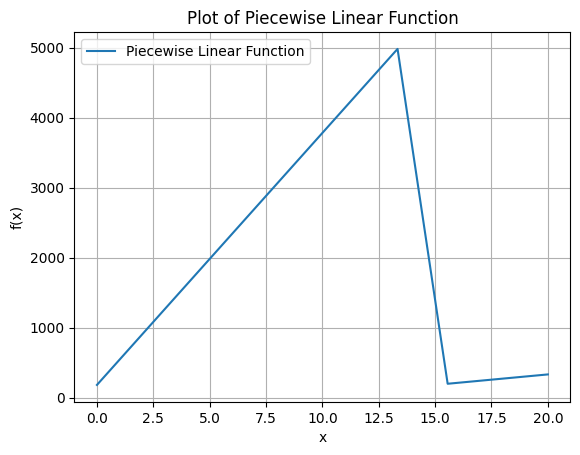

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi piecewise linear
def piecewise_linear(x, break_points, slopes):
    for i in range(len(break_points) - 1):
        if x >= break_points[i] and x < break_points[i + 1]:
            return slopes[i] * (x - break_points[i]) + slopes[-1]
    return slopes[-2] * (x - break_points[-2]) + slopes[-1]

# Nilai optimal dari variabel keputusan
y_optimal = [int(yi.value[0]) for yi in y]

# Koefisien kemiringan dan titik putus untuk setiap segmen
slopes = [360, 30, 240, 120, 90, 450, 300, 180]
break_points = [0, 15, 35, 55, 75, 95, 105]

# Membuat data untuk plot
x_values = np.linspace(0, 20, 10)  # 10 titik antara 0 dan 105
y_values = [piecewise_linear(x, break_points, slopes) for x in x_values]

# Plot
plt.plot(x_values, y_values, label='Piecewise Linear Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of Piecewise Linear Function')
plt.grid(True)
plt.legend()
plt.show()


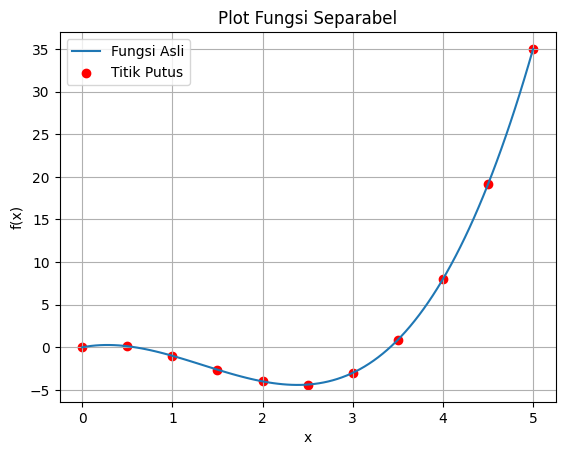

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi separabel
def f(x):
    return x**3 - 4*x**2 + 2*x

# Titik putus
breakpoints = np.arange(0, 5.5, 0.5)

# Nilai fungsi di titik putus
values_at_breakpoints = [f(x) for x in breakpoints]

# Membuat data untuk plot
x_values = np.linspace(0, 5, 100)
y_values = [f(x) for x in x_values]

# Plot fungsi
plt.plot(x_values, y_values, label='Fungsi Asli')
plt.scatter(breakpoints, values_at_breakpoints, color='red', label='Titik Putus')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot Fungsi Separabel')
plt.grid(True)
plt.legend()
plt.show()


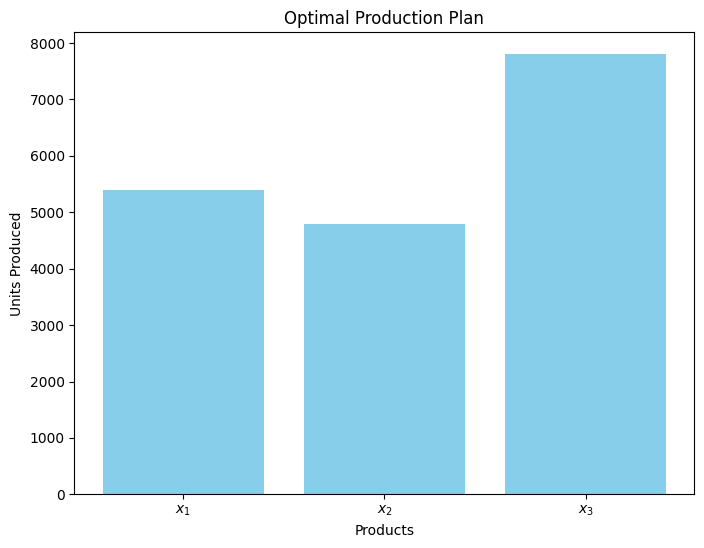

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nilai hasil optimal (misalnya ini adalah nilai yang sudah dihitung sebelumnya)
optimal_solution = [15*360, 20*240, 10*450 + 5*300 + 10*180]  # Contoh nilai optimal

# Label produk menggunakan LaTeX
products = [r'$x_1$', r'$x_2$', r'$x_3$']

# Plot grafik batang
plt.figure(figsize=(8, 6))
plt.bar(products, optimal_solution, color='skyblue')
plt.xlabel('Products')
plt.ylabel('Units Produced')
plt.title('Optimal Production Plan')
plt.show()


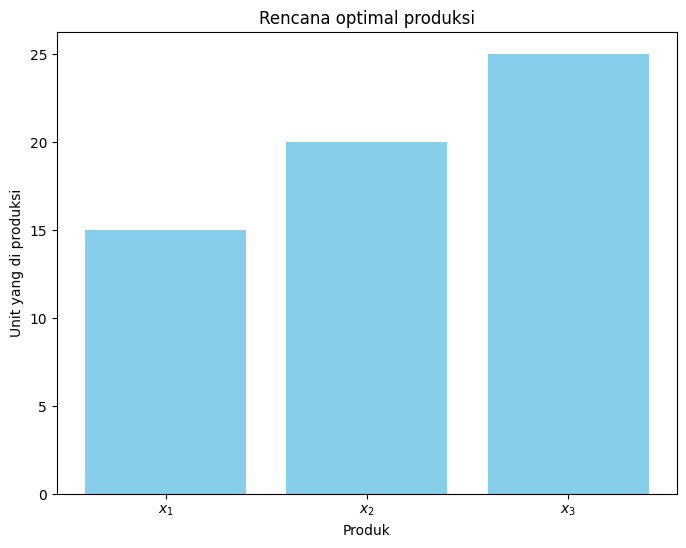

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nilai hasil optimal
optimal_solution = [15, 20, 25]  # hasil optimal yang diberikan sebelumnya

# Label produk menggunakan LaTeX
products = [r'$x_1$', r'$x_2$', r'$x_3$']

# Plot grafik batang
plt.figure(figsize=(8, 6))
plt.bar(products, optimal_solution, color='skyblue')
plt.xlabel('Produk')
plt.ylabel('Unit yang di produksi')
plt.title('Rencana optimal produksi')
plt.show()


In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 43.9 MB/s eta 0:00:00


In [ ]:
import pulp as lp

# Inisialisasi model
model = lp.LpProblem("Mixed Integer Linear Programming", lp.LpMaximize)

# Variabel
x11 = lp.LpVariable('x11', lowBound=0, upBound=15, cat='Integer')
x12 = lp.LpVariable('x12', lowBound=0)
x21 = lp.LpVariable('x21', lowBound=0, upBound=20, cat='Integer')
x22 = lp.LpVariable('x22', lowBound=0, upBound=20, cat='Integer')
x23 = lp.LpVariable('x23', lowBound=0)
x31 = lp.LpVariable('x31', lowBound=0, upBound=10, cat='Integer')
x32 = lp.LpVariable('x32', lowBound=0, upBound=5, cat='Integer')
x33 = lp.LpVariable('x33', lowBound=0, cat='Integer')
s1 = lp.LpVariable('s1', lowBound=0)
s2 = lp.LpVariable('s2', lowBound=0)
s3 = lp.LpVariable('s3', lowBound=0)

# Fungsi objektif
model += 360*x11 + 30*x12 + 240*x21 + 120*x22 + 90*x23 + 450*x31 + 300*x32 + 180*x33, "Profit"

# Kendala
model += x11 + x12 + x21 + x22 + x23 + x31 + x32 + x33 + s1 == 60, "Resource_1"
model += 3*x11 + 3*x12 + 2*x21 + 2*x22 + 2*x23 + s2 == 200, "Resource_2"
model += x11 + x12 + 2*x31 + 2*x32 + 2*x33 + s3 == 70, "Resource_3"

# Menyelesaikan model
model.solve()

# Menampilkan hasil
print("Status:", lp.LpStatus[model.status])
for v in model.variables():
    print(v.name, "=", v.varValue)
print("Total Profit = ", lp.value(model.objective))


Status: Optimal
s1 = 0.0
s2 = 115.0
s3 = 5.0
x11 = 15.0
x12 = 0.0
x21 = 20.0
x22 = 0.0
x23 = 0.0
x31 = 10.0
x32 = 5.0
x33 = 10.0
Total Profit =  18000.0


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
from gekko import GEKKO

# Koefisien untuk fungsi tujuan
c = [360, 30, 240, 120, 90, 450, 300, 180]

# Koefisien untuk kendala ketaksamaan
A = [[1, 1, 1, 1, 1, 1, 1, 1],    # Kendala 1: total unit <= 60
     [3, 3, 2, 2, 2, 0, 0, 0],    # Kendala 2: 3y11 + 3y12 + 2y21 + 2y22 + 2y23 <= 200
     [1, 1, 0, 0, 0, 1, 1, 1]]    # Kendala 3: y11 + y12 + y21 + y22 + y23 + 2y31 + 2y32 + 2y33 <= 70

b = [60, 200, 70]

# Batasan untuk setiap variabel
x_bounds = [(0, 15),  # y11
            (0, 15),  # y12
            (0, 20),  # y21
            (0, 20),  # y22
            (0, 20),  # y23
            (0, 10),  # y31
            (0, 5),   # y32
            (0, 10)]  # y33

# Inisialisasi model
m = GEKKO(remote=False)

# Variabel keputusan
y = [m.Var(lb=lb, ub=ub, integer=True) for lb, ub in x_bounds]

# Fungsi tujuan
profit = sum(ci * yi for ci, yi in zip(c, y))
m.Maximize(profit)

# Kendala ketaksamaan
for i, constraint_coeffs in enumerate(A):
    m.Equation(sum(ai * yi for ai, yi in zip(constraint_coeffs, y)) <= b[i])

# Penyelesaian masalah
m.solve(disp=False)

# Output hasil
if m.options.APPSTATUS == 1:
    print("Nilai Optimal (maksimalkan profit):", -m.options.OBJFCNVAL)
    print("Solusi Optimal (unit yang diproduksi):", [int(yi.value[0]) for yi in y])
else:
    print("Optimisasi gagal.")


Nilai Optimal (maksimalkan profit): 18000.0
Solusi Optimal (unit yang diproduksi): [15, 0, 20, 0, 0, 10, 5, 10]


In [ ]:
from gekko import GEKKO

# Koefisien untuk fungsi tujuan
c = [360, 30, 240, 120, 90, 450, 300, 180]

# Koefisien untuk kendala ketaksamaan
A = [[1, 1, 1, 1, 1, 1, 1, 1],    # Kendala 1: total unit <= 60
     [3, 3, 2, 2, 2, 0, 0, 0],    # Kendala 2: 3y11 + 3y12 + 2y21 + 2y22 + 2y23 <= 200
     [1, 1, 0, 0, 0, 1, 1, 1]]    # Kendala 3: y11 + y12 + y21 + y22 + y23 + 2y31 + 2y32 + 2y33 <= 70

b = [60, 200, 70]

# Koefisien untuk kendala keuntungan minimum dari produk 1 dan produk 2
profit_coeff = [360, 30, 240, 120, 90, 0, 0, 0]
profit_b = 9000

# Batasan untuk setiap variabel
x_bounds = [(0, 15),  # y11
            (0, None),  # y12
            (0, 20),  # y21
            (0, 20),  # y22
            (0, None),  # y23
            (0, 10),  # y31
            (0, 5),   # y32
            (0, None)]  # y33

# Inisialisasi model
m = GEKKO(remote=False)

# Variabel keputusan
y = [m.Var(lb=lb, ub=ub, integer=True) for lb, ub in x_bounds]

# Fungsi tujuan
profit = sum(ci * yi for ci, yi in zip(c, y))
m.Maximize(profit)

# Kendala ketaksamaan
for i, constraint_coeffs in enumerate(A):
    m.Equation(sum(ai * yi for ai, yi in zip(constraint_coeffs, y)) <= b[i])

# Kendala keuntungan minimum dari produk 1 dan produk 2
m.Equation(sum(pc * yi for pc, yi in zip(profit_coeff, y)) >= profit_b)

# Penyelesaian masalah
m.solve(disp=False)

# Output hasil
if m.options.APPSTATUS == 1:
    print("Nilai Optimal (maksimalkan profit):", -m.options.OBJFCNVAL)
    print("Solusi Optimal (unit yang diproduksi):", [int(yi.value[0]) for yi in y])
else:
    print("Optimisasi gagal.")


Nilai Optimal (maksimalkan profit): 18000.0
Solusi Optimal (unit yang diproduksi): [15, 0, 20, 0, 0, 10, 5, 10]


In [ ]:
import pulp as lp

# Inisialisasi model
model = lp.LpProblem("Mixed Integer Linear Programming", lp.LpMaximize)

# Variabel
x11 = lp.LpVariable('x11', lowBound=0, upBound=15, cat='Integer')
x12 = lp.LpVariable('x12', lowBound=0)
x21 = lp.LpVariable('x21', lowBound=0, upBound=20, cat='Integer')
x22 = lp.LpVariable('x22', lowBound=0, upBound=20, cat='Integer')
x23 = lp.LpVariable('x23', lowBound=0)
x31 = lp.LpVariable('x31', lowBound=0, upBound=10, cat='Integer')
x32 = lp.LpVariable('x32', lowBound=0, upBound=5, cat='Integer')
x33 = lp.LpVariable('x33', lowBound=0, cat='Integer')

# Fungsi objektif
model += (360 * x11 + 30 * x12 + 240 * x21 + 120 * x22 + 90 * x23 +
          450 * x31 + 300 * x32 + 180 * x33), "Total Profit"

# Kendala
model += (x11 + x12 + x21 + x22 + x23 + x31 + x32 + x33 <= 60), "Resource_1"
model += (3 * x11 + 3 * x12 + 2 * x21 + 2 * x22 + 2 * x23 <= 200), "Resource_2"
model += (x11 + x12 + 2 * x31 + 2 * x32 + 2 * x33 <= 70), "Resource_3"

# Kendala keuntungan minimum untuk produk 1 dan 2
model += (360 * x11 + 30 * x12 + 240 * x21 + 120 * x22 + 90 * x23 >= 9000), "Min_Profit_Prod_1_2"

# Menyelesaikan model
model.solve()

# Menampilkan hasil
print("Status:", lp.LpStatus[model.status])
for v in model.variables():
    print(v.name, "=", v.varValue)
print("Total Profit = ", lp.value(model.objective))


Status: Optimal
x11 = 15.0
x12 = 0.0
x21 = 20.0
x22 = 0.0
x23 = 0.0
x31 = 10.0
x32 = 5.0
x33 = 10.0
Total Profit =  18000.0


In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpStatus

# Inisialisasi masalah
model = LpProblem(name="maximize_profit", sense=LpMaximize)

# Variabel keputusan
x11 = LpVariable(name="x11", lowBound=0, upBound=15, cat='Continuous')
x12 = LpVariable(name="x12", lowBound=0, cat='Continuous')
x21 = LpVariable(name="x21", lowBound=0, upBound=20, cat='Continuous')
x22 = LpVariable(name="x22", lowBound=0, upBound=20, cat='Continuous')
x23 = LpVariable(name="x23", lowBound=0, cat='Continuous')
x31 = LpVariable(name="x31", lowBound=0, upBound=10, cat='Continuous')
x32 = LpVariable(name="x32", lowBound=0, upBound=5, cat='Continuous')
x33 = LpVariable(name="x33", lowBound=0, cat='Continuous')

s1 = LpVariable(name="s1", lowBound=0, cat='Continuous')
s2 = LpVariable(name="s2", lowBound=0, cat='Continuous')
s3 = LpVariable(name="s3", lowBound=0, cat='Continuous')
s4 = LpVariable(name="s4", lowBound=0, cat='Continuous')

# Fungsi tujuan
model += 360*x11 + 30*x12 + 240*x21 + 120*x22 + 90*x23 + 450*x31 + 300*x32 + 180*x33, "Profit"

# Kendala
model += x11 + x12 + x21 + x22 + x23 + x31 + x32 + x33 + s1 == 60, "Resource_1"
model += 3*x11 + 3*x12 + 2*x21 + 2*x22 + 2*x23 + s2 == 200, "Resource_2"
model += x11 + x12 + 2*x31 + 2*x32 + 2*x33 + s3 == 70, "Resource_3"
model += 360*x11 + 30*x12 + 240*x21 + 120*x22 + 90*x23 - s4 >= 9000, "Profit_constraint"

# Menyelesaikan model
model.solve()

# Menampilkan hasil
print("Status:", LpStatus[model.status])
if LpStatus[model.status] == 'Optimal':
    print("Total Profit = ", model.objective.value())
    print("Nilai Optimal:")
    print(f"x11 = {x11.value()}")
    print(f"x12 = {x12.value()}")
    print(f"x21 = {x21.value()}")
    print(f"x22 = {x22.value()}")
    print(f"x23 = {x23.value()}")
    print(f"x31 = {x31.value()}")
    print(f"x32 = {x32.value()}")
    print(f"x33 = {x33.value()}")
    print(f"s1 = {s1.value()}")
    print(f"s2 = {s2.value()}")
    print(f"s3 = {s3.value()}")
    print(f"s4 = {s4.value()}")
else:
    print("Tidak ada solusi optimal yang ditemukan.")


Status: Optimal
Total Profit =  18000.0
Nilai Optimal:
x11 = 15.0
x12 = 0.0
x21 = 20.0
x22 = 0.0
x23 = 0.0
x31 = 10.0
x32 = 5.0
x33 = 10.0
s1 = 0.0
s2 = 115.0
s3 = 5.0
s4 = 0.0


In [ ]:
import pulp

# Inisialisasi masalah
model = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

# Variabel keputusan
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

# Fungsi tujuan
model += 3 * x1 + 4 * x2, "Total Profit"

# Kendala
model += x1 + 3 * x2 <= 8, "Constraint_1"
model += 5 * x1 + 2 * x2 <= 14, "Constraint_2"

# Penyelesaian masalah
model.solve()

# Output hasil
print(f"Status: {pulp.LpStatus[model.status]}")
print(f"x1: {pulp.value(x1)}")
print(f"x2: {pulp.value(x2)}")
print(f"Total Profit: {pulp.value(model.objective)}")


Status: Optimal
x1: 2.0
x2: 2.0
Total Profit: 14.0


In [ ]:
import pulp

# Define the LP problem
lp_problem = pulp.LpProblem("Maximize_Z", pulp.LpMaximize)

# Define decision variables
x11 = pulp.LpVariable('x11', lowBound=0, upBound=1, cat='Continuous')
x12 = pulp.LpVariable('x12', lowBound=0, upBound=1, cat='Continuous')
x13 = pulp.LpVariable('x13', lowBound=0, upBound=1, cat='Continuous')
x21 = pulp.LpVariable('x21', lowBound=0, upBound=1, cat='Continuous')
x22 = pulp.LpVariable('x22', lowBound=0, upBound=1, cat='Continuous')
x23 = pulp.LpVariable('x23', lowBound=0, upBound=1, cat='Continuous')

# Objective function
lp_problem += 3*x11 - 3*x12 - 15*x13 + 4*x21 - 4*x23, "Z"

# Constraints
lp_problem += x11 + x12 + x13 + 3*x21 + 3*x22 + 3*x23 <= 8
lp_problem += 5*x11 + 5*x12 + 5*x13 + 2*x21 + 2*x22 + 2*x23 <= 14
lp_problem += x11 + x12 + x13 == 1
lp_problem += x21 + x22 + x23 == 1

# Solve the problem
lp_problem.solve()

# Print the results
print(f"Status: {pulp.LpStatus[lp_problem.status]}")
print(f"Objective value (Z): {pulp.value(lp_problem.objective)}")
for variable in lp_problem.variables():
    print(f"{variable.name} = {variable.varValue}")


Status: Optimal
Objective value (Z): 7.0
x11 = 1.0
x12 = 0.0
x13 = 0.0
x21 = 1.0
x22 = 0.0
x23 = 0.0


In [ ]:
from sympy import *
import numpy as np
import math
from IPython.display import display, Math
def kkt():
    m = int(input("Masukkan banyak variabel : "))
    var = []
    for i in range(m):
        masuk = input(f'Masukkan variabel ke-{i+1} : ')
        var.append(symbols(masuk))

    fungsi = input("Masukkan fungsi objektif : ")
    fungsi = sympify(fungsi)

    n = int(input("Masukkan banyak kendala : "))
    bener = input("Apakah solusi lebih dari 0 ? (y/t): ")

    G = 0
    H = 0
    g = []
    h = []
    var_g = []
    var_h = []
    tanda = []

    for i in range(n):
        masuk = input(f"Masukkan fungsi kendala ke-{i+1} : ")
        masuk = sympify(masuk)
        masukt = input(f"Masukkan tanda ke-{i+1} : ")
        tanda.append(masukt)
        if tanda[i] == '=':
            h.append(masuk)
            var_h.append(symbols(f'lambda{i}'))
            H += 1
        elif tanda[i] == '>=':
            g.append(-masuk)
            var_g.append(symbols(f'pi{i}'))
            G += 1
        else:
            g.append(masuk)
            var_g.append(symbols(f'pi{i}'))
            G += 1
    G=g.copy()
    g = [g[i] * var_g[i] for i in range(len(g))]
    h = [h[i] * var_h[i] for i in range(len(h))]

    hesian = hessian(fungsi, var)
    kondisi = True
    gabung = var + var_g + var_h
    turun=fungsi+sum(g)+sum(h)
    print(turun)
    for i in gabung :
      print(f"dL/d{i} : {diff(fungsi,i)}")
    if kondisi:
        h = Matrix(h)
        g = Matrix(g)
        G=Matrix(G)

        if H == 0:
            h = zeros(1, 1)
            zero_h = zeros(len(var), 1)
        else:
            gradh = [diff(i, j) for i in h for j in var]
            gradh = Matrix(gradh).reshape(len(h), len(var)).T
            zero_h = zeros(len(var), 1)
            for i in range(len(gradh[0, :])):
                zero_h += gradh[:, i]

        if G == 0:
            g = zeros(1, 1)
            zero_g = zeros(len(var), 1)
        else:
            gradg = [diff(i, j) for i in g for j in var]
            gradg = Matrix(gradg).reshape(len(g), len(var)).T
            zero_g = zeros(len(var), 1)
            for i in range(len(gradg[0, :])):
                zero_g += gradg[:, i]

        gradf = [diff(fungsi, i) for i in var]
        gradf = Matrix(gradf)
        L = gradf + zero_h + zero_g
        L = L.col_join(g)
        L = L.col_join(h)
        L = L.col_join(G)

        for i in range(len(L)):
            display(Math(latex(L[i])))

        solusi = solve(L, gabung)
        solutions = [dict(zip(gabung, solusi)) for solusi in solusi]

        # Filter solusi jika bener == 'y'
        if bener.lower() == 'y':
            solusi_baru = []
            for sol in solutions:
                if all(sol[var_name] > 0 for var_name in var):
                    solusi_baru.append(sol)
            solutions = solusi_baru

        return fungsi, solutions, L


In [ ]:
fungsi,sol,l=kkt()

Masukkan banyak variabel : 2
Masukkan variabel ke-1 : x1
Masukkan variabel ke-2 : x2
Masukkan fungsi objektif : 4*x1+6*x2-x1**3-2*x2**2
Masukkan banyak kendala : 2
Apakah solusi lebih dari 0 ? (y/t): y
Masukkan fungsi kendala ke-1 :  x1-3*x2-8
Masukkan tanda ke-1 : <=
Masukkan fungsi kendala ke-2 :  5*x1+2*x2-14
Masukkan tanda ke-2 : <=
pi0*(x1 - 3*x2 - 8) + pi1*(5*x1 + 2*x2 - 14) - x1**3 + 4*x1 - 2*x2**2 + 6*x2
dL/dx1 : 4 - 3*x1**2
dL/dx2 : 6 - 4*x2
dL/dpi0 : 0
dL/dpi1 : 0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
from sympy import *
import numpy as np
import math
from IPython.display import display, Math
def kkt1():
    m = int(input("Masukkan banyak variabel : "))
    var = []
    for i in range(m):
        masuk = input(f'Masukkan variabel ke-{i+1} : ')
        var.append(symbols(masuk))

    fungsi = input("Masukkan fungsi objektif : ")
    fungsi = sympify(fungsi)

    n = int(input("Masukkan banyak kendala : "))
    bener = input("Apakah solusi lebih dari 0 ? (y/t): ")

    G = 0
    H = 0
    g = []
    h = []
    var_g = []
    var_h = []
    tanda = []

    for i in range(n):
        masuk = input(f"Masukkan fungsi kendala ke-{i+1} : ")
        masuk = sympify(masuk)
        masukt = input(f"Masukkan tanda ke-{i+1} : ")
        tanda.append(masukt)
        if tanda[i] == '=':
            h.append(masuk)
            var_h.append(symbols(f'lambda{i}'))
            H += 1
        elif tanda[i] == '>=':
            g.append(-masuk)
            var_g.append(symbols(f'pi{i}'))
            G += 1
        else:
            g.append(masuk)
            var_g.append(symbols(f'pi{i}'))
            G += 1
    g = [g[i] * var_g[i] for i in range(len(g))]
    h = [h[i] * var_h[i] for i in range(len(h))]

    hesian = hessian(fungsi, var)
    kondisi = True
    gabung = var + var_g + var_h
    turun=fungsi+sum(g)+sum(h)
    print(turun)
    for i in gabung :
      print(f"dL/d{i} : {diff(fungsi,i)}")
    if kondisi:
        h = Matrix(h)
        g = Matrix(g)
        if H == 0:
            h = zeros(1, 1)
            zero_h = zeros(len(var), 1)
        else:
            gradh = [diff(i, j) for i in h for j in var]
            gradh = Matrix(gradh).reshape(len(h), len(var)).T
            zero_h = zeros(len(var), 1)
            for i in range(len(gradh[0, :])):
                zero_h += gradh[:, i]

        if G == 0:
            g = zeros(1, 1)
            zero_g = zeros(len(var), 1)
        else:
            gradg = [diff(i, j) for i in g for j in var]
            gradg = Matrix(gradg).reshape(len(g), len(var)).T
            zero_g = zeros(len(var), 1)
            for i in range(len(gradg[0, :])):
                zero_g += gradg[:, i]

        gradf = [diff(fungsi, i) for i in var]
        gradf = Matrix(gradf)
        L = gradf + zero_h + zero_g
        L = L.col_join(g)
        L = L.col_join(h)

        for i in range(len(L)):
            display(Math(latex(L[i])))

        solusi = solve(L, gabung)
        solutions = [dict(zip(gabung, solusi)) for solusi in solusi]

        # Filter solusi jika bener == 'y'
        if bener.lower() == 'y':
            solusi_baru = []
            for sol in solutions:
                if all(sol[var_name] > 0 for var_name in var):
                    solusi_baru.append(sol)
            solutions = solusi_baru

        return fungsi, solutions, L


In [ ]:
fungsi1,sol1,l1=kkt1()

Masukkan banyak variabel : 2
Masukkan variabel ke-1 : x1
Masukkan variabel ke-2 : x2
Masukkan fungsi objektif :  4*x1+6*x2-x1**3-2*x2**2
Masukkan banyak kendala : 2
Apakah solusi lebih dari 0 ? (y/t): y
Masukkan fungsi kendala ke-1 : x1-3*x2-8
Masukkan tanda ke-1 : <=
Masukkan fungsi kendala ke-2 :  5*x1+2*x2-14
Masukkan tanda ke-2 : <=
pi0*(x1 - 3*x2 - 8) + pi1*(5*x1 + 2*x2 - 14) - x1**3 + 4*x1 - 2*x2**2 + 6*x2
dL/dx1 : 4 - 3*x1**2
dL/dx2 : 6 - 4*x2
dL/dpi0 : 0
dL/dpi1 : 0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
sol

NameError: name 'sol' is not defined

In [ ]:
sol1

[{x1: 2*sqrt(3)/3, x2: 3/2, pi0: 0, pi1: 0},
 {x1: -25/6 + sqrt(1333)/6,
  x2: 209/12 - 5*sqrt(1333)/12,
  pi0: 0,
  pi1: 191/6 - 5*sqrt(1333)/6}]

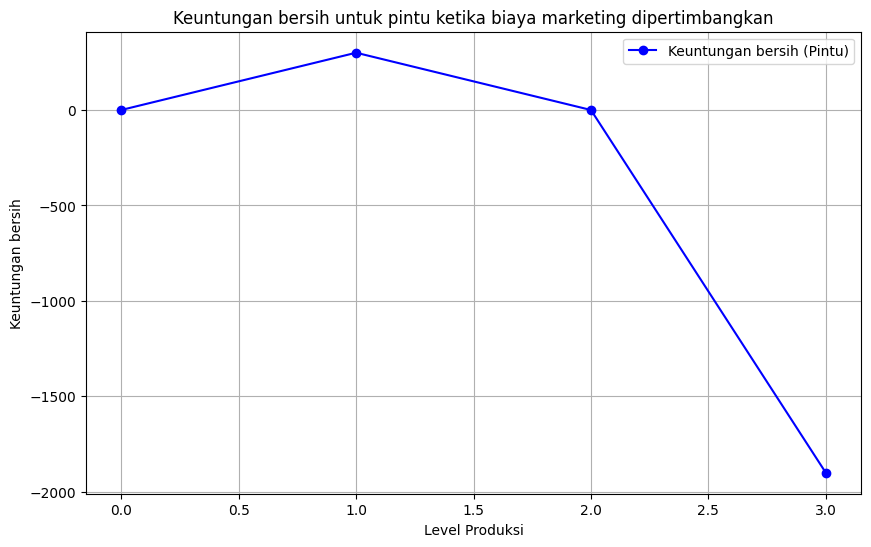

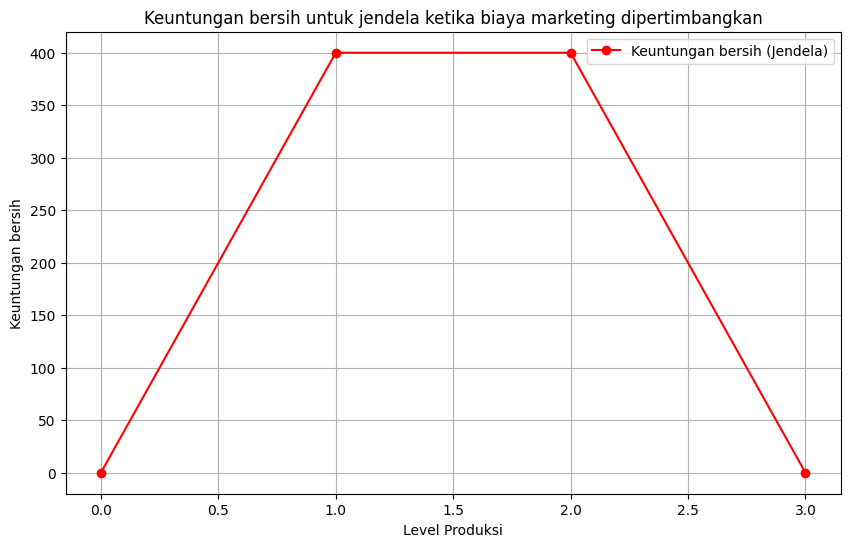

In [ ]:
import matplotlib.pyplot as plt

# Data for doors
production_levels_door = [0, 1, 2, 3]
gross_profit_door = [0, 400, 800, 1200]
marketing_cost_door = [0, 100, 800, 2700]
net_profit_door = [0, 300, 0, -1900]

# Data for windows
production_levels_window = [0, 1, 2, 3]
gross_profit_window = [0, 600, 1200, 1800]
marketing_cost_window = [0, 200, 800, 1800]
net_profit_window = [0, 400, 400, 0]

# Plotting the data for doors
plt.figure(figsize=(10, 6))
plt.plot(production_levels_door, net_profit_door, 'bo-', label='Keuntungan bersih (Pintu)')
plt.title('Keuntungan bersih untuk pintu ketika biaya marketing dipertimbangkan')
plt.xlabel('Level Produksi')
plt.ylabel('Keuntungan bersih')
plt.grid(True)
plt.legend()
plt.show()
print()
# Plotting the data for windows
plt.figure(figsize=(10, 6))
plt.plot(production_levels_window, net_profit_window, 'ro-', label='Keuntungan bersih (Jendela)')
plt.title('Keuntungan bersih untuk jendela ketika biaya marketing dipertimbangkan')
plt.xlabel('Level Produksi')
plt.ylabel('Keuntungan bersih')
plt.grid(True)
plt.legend()
plt.show()
